In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime

In [18]:
df = pd.read_excel("Threshold_Data.xlsx")
# df = pd.read_excel("Cleaned_Data.xlsx")

In [19]:
df.dropna(inplace=True)

In [20]:
one_hot_encode = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')

In [21]:
data = df[['Income', 'Total_Children', 'Marital_Status', 'Education', 'Response', 'TotalPurchases','Complain', 'NumWebVisitsMonth','CLV','Age', 'Complain', 'Total_Spent', 'AOV']]

# data = df[['Income', 'Kidhome', 'Teenhome', 'Marital_Status', 'Education', 'Response', 'Recency', 'TotalPurchases','Complain', 'NumWebVisitsMonth','BuyingPower','Age']]

data['Marital_Status'].unique()

array(['Single', 'Married', 'Together'], dtype=object)

In [22]:
ohe_marital = one_hot_encode.fit_transform(data[['Marital_Status']])
column_names = [f"{col}_{val}" for col, val in zip(['Marital_Status'] * ohe_marital.shape[1], one_hot_encode.get_feature_names_out())]
ohe_education = one_hot_encode.fit_transform(data[['Education']])
data = data.drop(['Marital_Status', 'Education'], axis=1)
data = pd.concat([data, ohe_education], axis=1)
data = pd.concat([data, ohe_marital], axis=1)

# Baseline Modelling

In [23]:
X = data.drop('Response', axis=1).iloc[:,1:]


In [24]:
y = data['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [26]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
preds = classifier.predict(scaler.transform(X_test))

In [27]:
acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds)
rec = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
auc = roc_auc_score(y_test, preds)

In [28]:
print("Accuracy: %.4f" % acc)
print("Precision: %.4f" % prec)
print("Recall: %.4f" % rec)
print("F1: %.4f" % f1)
print("AUC: %.4f" % auc)

Accuracy: 0.7977
Precision: 0.3789
Recall: 0.5455
F1: 0.4472
AUC: 0.6939


# Figures

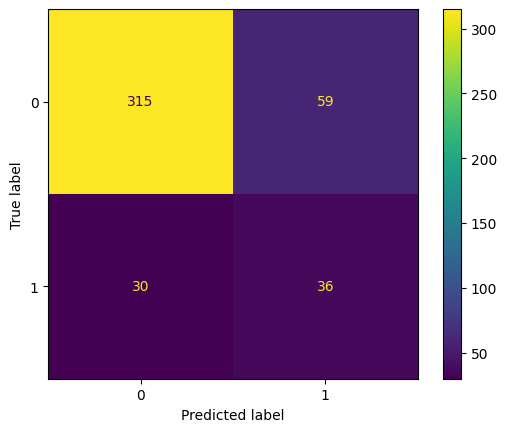

In [29]:
actual = y_test
predicted = preds


confusion_matrix = confusion_matrix(actual, predicted, labels=classifier.classes_)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = classifier.classes_)

cm_display.plot()
plt.show()